In [44]:
!pip install nbconvert

In [45]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
!ls /content/drive/MyDrive/655_deep_learning/

'Artificial Neural Networks _Regression_No_Activation_Notebook_1.ipynb'
'Artificial Neural Networks _Regression_Notebook_Activation_2.ipynb'
 Assignmenet_2_f1_scores.csv
 CIFAR_10_CNN_Sequential_Model_Notebook_2.ipynb
 Deep_Learning_Classifier.ipynb
 DS-655_Assignment_1_Sushika.ipynb
 DS-655_Assignment_1_Sushika.pdf
 DS_655_Assignment_2_Sushika.ipynb
 Hyperparameter_Tuning_with_Keras_Tuner.ipynb
 images.npy
 Labels.csv
 MNIST_CNN_Sequential_Model_Notebook_1.ipynb
 model_1_predictions_final.csv
 model_2_predictions_final.csv
 Notebook_1_Intro_to_Pixel_Theory_PIL.ipynb
 Notebook_2_Intro_to_Pixel_Theory_OpenCV.ipynb.ipynb
 Notebook_3_Edge_Detection_and_Kernels.ipynb
 picture_notebook_1.webp
 Regularization_Transfer_Learning_Keras_Tuner.ipynb
 test.csv
 train.csv


In [67]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/655_deep_learning/DS_655_Assignment_2_Sushika.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/655_deep_learning/DS_655_Assignment_2_Sushika.ipynb to pdf
[NbConvertApp] Support files will be in DS_655_Assignment_2_Sushika_files/
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushika_files
[NbConvertApp] Making directory ./DS_655_Assignment_2_Sushik

In [4]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [5]:
# Ensure that you have the latest versions of the libraries installed:
!pip install --upgrade pillow matplotlib
#import warnings
#warnings.filterwarnings('ignore')

# Importing the latest versions of the libraries
from PIL import Image
import matplotlib.pyplot as plt

# **Step 1: Exploratory Data Analysis (EDA)**

## 1.1 Loading the Dataset

In [6]:
# Load the images from .npy file
images = np.load('/content/drive/MyDrive/655_deep_learning/images.npy')

# Load the labels from .csv file
labels_df = pd.read_csv('/content/drive/MyDrive/655_deep_learning/Labels.csv')

# Display the first few rows of labels to verify successful loading
print(labels_df.head())
print(f"\n Shape of images: {images.shape}")
print(f"\n Shape of labels: {labels_df.shape}")

                       Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

 Shape of images: (4750, 128, 128, 3)

 Shape of labels: (4750, 1)


In [7]:
print(labels_df.columns)


Index(['Label'], dtype='object')


## 1.2 Visualize Class Distribution

Reference: The approach for plotting class distributions is taken from Week 6 lecture, MNIST_CNN_Sequential_Model, where class frequency visualizations help in analyzing dataset balance.

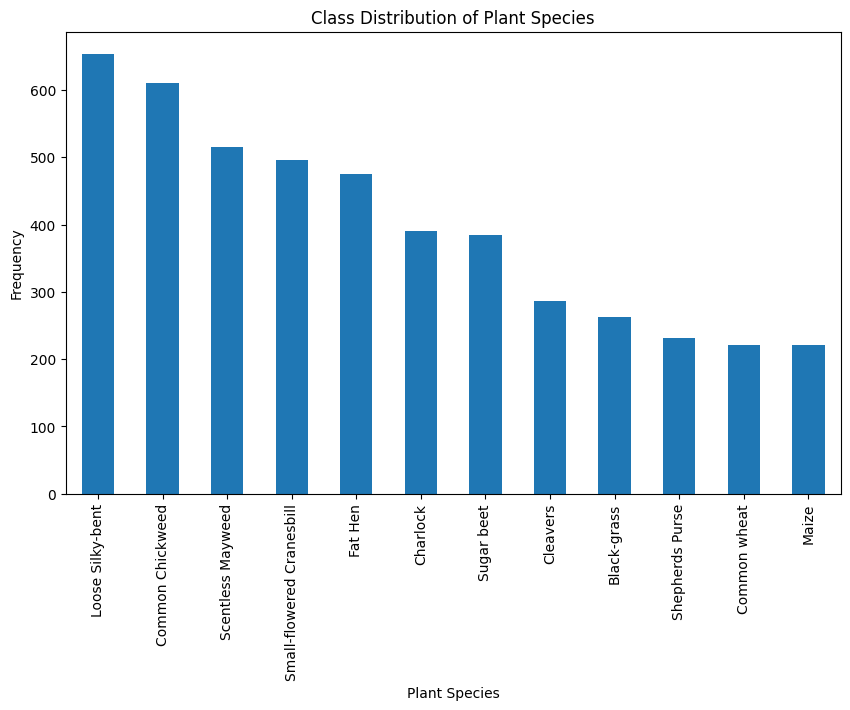

In [8]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.figure(figsize=(10, 6))
labels_df['Label'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Plant Species')
plt.xlabel('Plant Species')
plt.ylabel('Frequency')
plt.show()

## 1.3 Plot Sample Images in a 3x4 Grid



Reference: Displaying a grid of sample images with corresponding labels follows a similar visualization structure as in Week 6 lecture,  CIFAR_10_CNN_Sequential_Model, which provides examples of displaying images in grids.

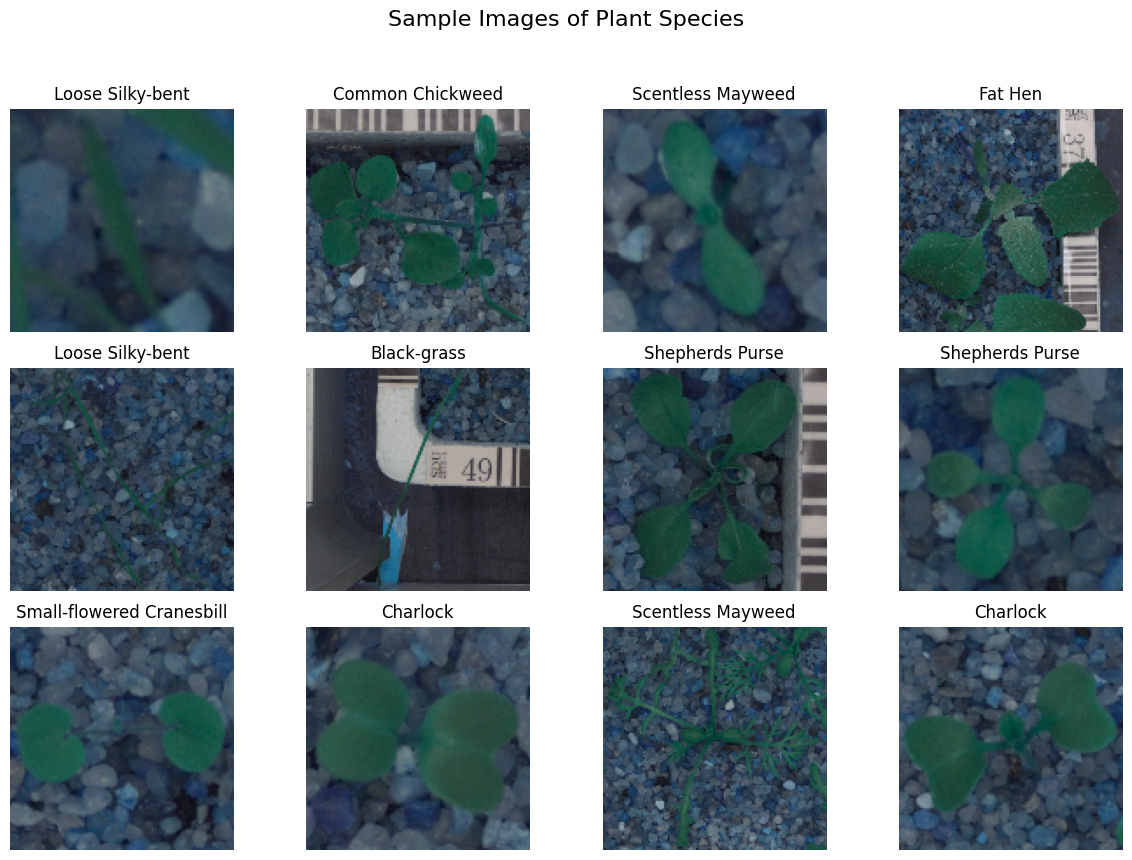

In [9]:
import random

# Set up a 3x4 grid for sample images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Sample Images of Plant Species', fontsize=16)

# Randomly select 12 images
sample_indices = random.sample(range(len(images)), 12)
for idx, ax in zip(sample_indices, axes.flat):
    ax.imshow(images[idx])
    ax.set_title(labels_df['Label'].iloc[idx])
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Step 2: Data Preprocessing**

## 2.1 Resize Images to 64x64

Reference: The resizing technique takes cues from Week 6 CIFAR_10_CNN_Sequential_Model, where image dimensions are adjusted for computational efficiency.

In [10]:
import cv2
# Resize images to 64x64
images_resized = np.array([cv2.resize(img, (64, 64)) for img in images])
print(f"Resized images shape: {images_resized.shape}")

Resized images shape: (4750, 64, 64, 3)


## 2.2 Encode Target Variables

Reference: The encoding approach is adapted from Week 6 lecture, MNIST_CNN_Sequential_Model, which encodes labels to prepare them for classification.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode plant species labels using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_df['Label'])

# Display encoded labels sample
print(f"Label Encoded Sample: {labels_encoded[:5]}")
print(f"Classes: {label_encoder.classes_}")

Label Encoded Sample: [10 10 10 10 10]
Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


## 2.3 Normalize the Images

Reference: The normalization technique aligns with the data preprocessing steps in Week 6 lecture , CIFAR_10_CNN_Sequential_Model, where pixel values are scaled to improve training stability.

In [12]:
# Normalize the images by scaling pixel values between 0 and 1
images_normalized = images_resized / 255.0
print(f"Normalized images range: Min={images_normalized.min()}, Max={images_normalized.max()}")

Normalized images range: Min=0.0, Max=1.0


# **Sterp 3-Model 1: Basic CNN Model**

## 3.1 Build a Basic CNN Model

Reference: The architecture and general model structure are inspired by CIFAR_10_CNN_Sequential_Model, which uses a simple CNN model suitable for image classification.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 output units for 12 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,748 (2.61 MB)

 Trainable params: 684,748 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train the Model with Early Stopping

Reference: The training process with accuracy and loss tracking is based on CIFAR_10_CNN_Sequential_Model. Early stopping is included to prevent overfitting.

In [14]:
# Split the data
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_normalized, labels_encoded, test_size=0.2, random_state=42)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.1361 - loss: 2.4539 - val_accuracy: 0.2568 - val_loss: 2.2272
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2863 - loss: 2.1343 - val_accuracy: 0.4032 - val_loss: 1.7840
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3846 - loss: 1.7630 - val_accuracy: 0.5295 - val_loss: 1.4296
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4573 - loss: 1.5429 - val_accuracy: 0.5589 - val_loss: 1.2514
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5225 - loss: 1.3705 - val_accuracy: 0.6379 - val_loss: 1.0902
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5652 - loss: 1.2335 - val_accuracy: 0.6463 - val_loss: 1.0366
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5891 - loss: 1.1472 - val_accuracy: 0.6179 - val_loss: 1.0772
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5971 - loss: 1.1551 - val_accuracy: 

## 3.3 Plot Accuracy and Loss Curves

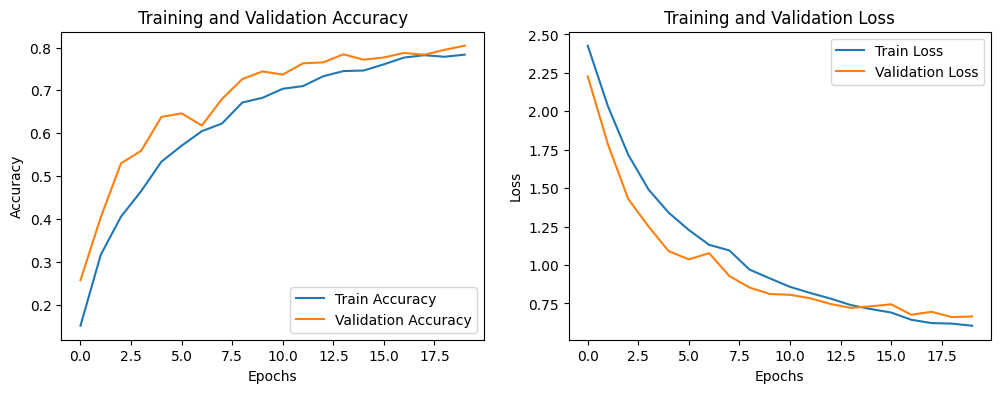

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 3.4 Evaluate Model Performance with a Confusion Matrix

Reference: The confusion matrix and classification report steps are adapted from CIFAR_10_CNN_Sequential_Model, where model evaluation across classes is demonstrated.

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


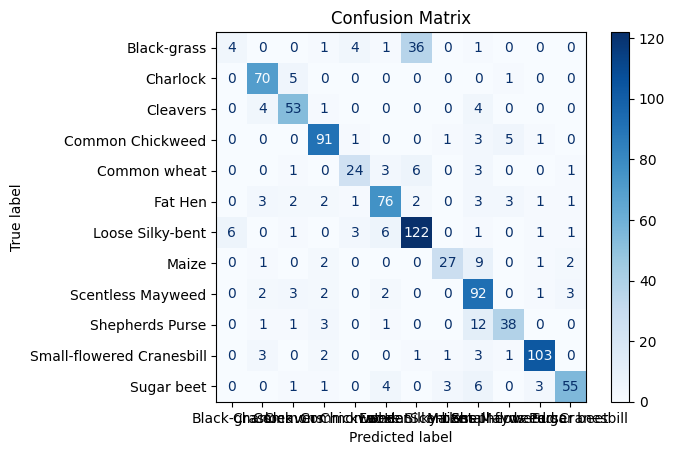

                           precision    recall  f1-score   support

              Black-grass       0.40      0.09      0.14        47
                 Charlock       0.83      0.92      0.88        76
                 Cleavers       0.79      0.85      0.82        62
         Common Chickweed       0.87      0.89      0.88       102
             Common wheat       0.73      0.63      0.68        38
                  Fat Hen       0.82      0.81      0.81        94
         Loose Silky-bent       0.73      0.87      0.79       141
                    Maize       0.84      0.64      0.73        42
        Scentless Mayweed       0.67      0.88      0.76       105
          Shepherds Purse       0.79      0.68      0.73        56
Small-flowered Cranesbill       0.93      0.90      0.92       114
               Sugar beet       0.87      0.75      0.81        73

                 accuracy                           0.79       950
                macro avg       0.77      0.74      0.75    

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


## 3.5 Visualize Test Samples with Predictions

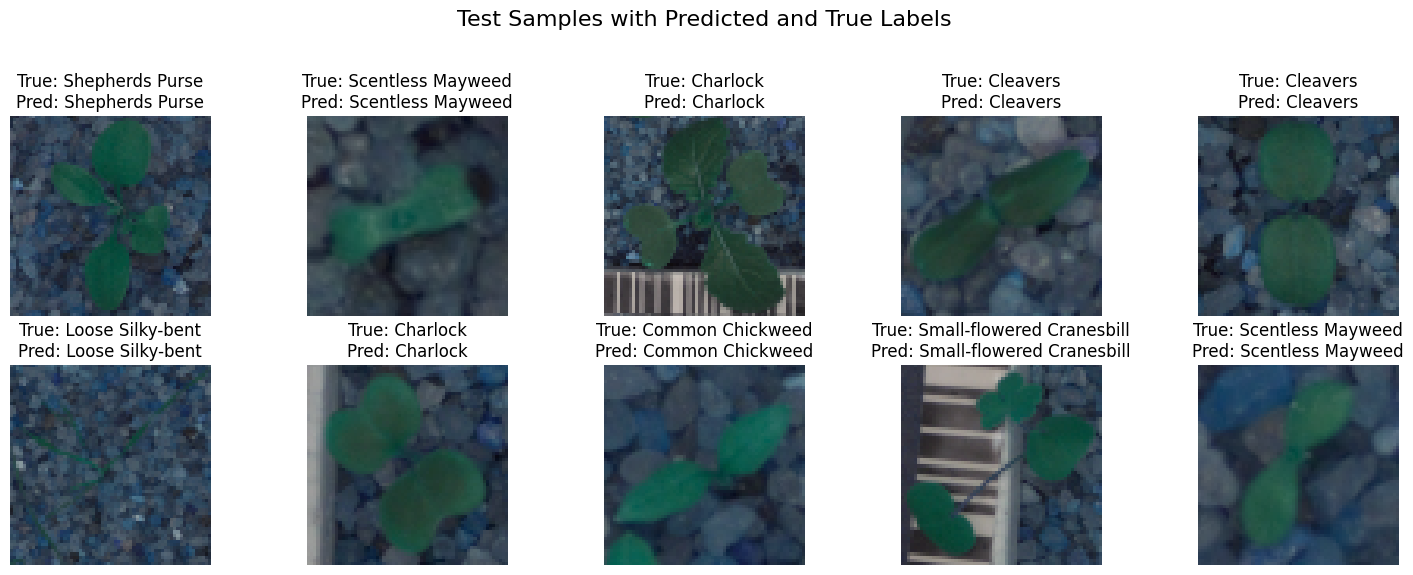

In [17]:
# Visualize a few test samples with their predicted and true labels
import random

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Test Samples with Predicted and True Labels', fontsize=16)

sample_indices = random.sample(range(len(X_val)), 10)
for idx, ax in zip(sample_indices, axes.flat):
    ax.imshow(X_val[idx])
    ax.set_title(f"True: {label_encoder.inverse_transform([y_val[idx]])[0]}\nPred: {label_encoder.inverse_transform([y_pred[idx]])[0]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Step 4: Model 2 - Enhanced CNN with Data Augmentation and Regularization

## 4.1 Data Augmentation

Reference: The data augmentation process is based on techniques from CIFAR_10_CNN_Sequential_Model, where various augmentations are applied to improve model robustness.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=10,     # Random rotation between 0 and 20 degrees
    width_shift_range=0.1, # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True    # Random horizontal flip
)

# Fit the data generator on training images
datagen.fit(X_train)


## 4.2 Build the Enhanced CNN Model with Batch Normalization and Spatial Dropout

Reference: The model architecture with batch normalization and spatial dropout is adapted from MNIST_CNN_Sequential_Model, which includes techniques for regularization and training stability.

In [23]:
from tensorflow.keras.layers import BatchNormalization, SpatialDropout2D

# Define an enhanced CNN model architecture
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    SpatialDropout2D(0.3),  # Spatial Dropout for regularization

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    SpatialDropout2D(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    SpatialDropout2D(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Standard Dropout for dense layers
    Dense(12, activation='softmax')  # 12 output units for 12 classes
])

# Compile the enhanced model
enhanced_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
enhanced_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_3                  │ (None, 31, 31, 32)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_4                  │ (None, 14, 14, 64)          │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout2d_5                  │ (None, 6, 6, 128)           │               0 │
│ (SpatialDropout2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 685,644 (2.62 MB)

 Trainable params: 685,196 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

## 4.3 Train the Enhanced Model with Data Augmentation

Reference: The training with data augmentation is based on CIFAR_10_CNN_Sequential_Model, where augmented data is used to improve model generalization.

In [24]:
# Train the model with data augmentation
history_enhanced = enhanced_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10,
    callbacks=[early_stopping]
)


Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.1573 - loss: 3.0819 - val_accuracy: 0.0495 - val_loss: 11.4028
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.2656 - loss: 2.2034 - val_accuracy: 0.1484 - val_loss: 5.4004
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3015 - loss: 2.0311 - val_accuracy: 0.2221 - val_loss: 2.3632
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.3528 - loss: 1.9148 - val_accuracy: 0.4137 - val_loss: 1.8522
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3575 - loss: 1.9069 - val_accuracy: 0.4095 - val_loss: 1.7177


## 4.4 Plot Accuracy and Loss Curves

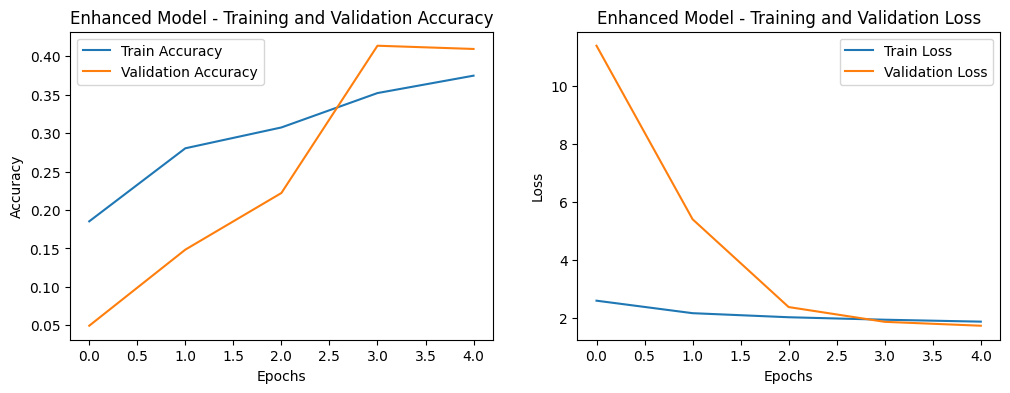

In [25]:
# Plot training & validation accuracy and loss for the enhanced model
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 4.5 Evaluate the Enhanced Model with a Confusion Matrix and Classification Report

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


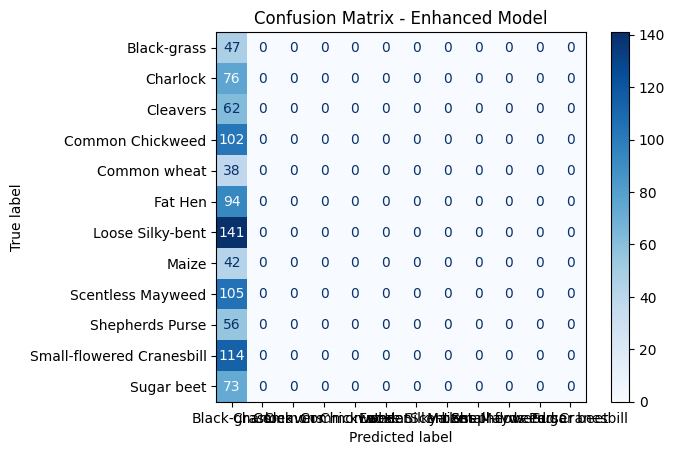

                           precision    recall  f1-score   support

              Black-grass       0.05      1.00      0.09        47
                 Charlock       0.00      0.00      0.00        76
                 Cleavers       0.00      0.00      0.00        62
         Common Chickweed       0.00      0.00      0.00       102
             Common wheat       0.00      0.00      0.00        38
                  Fat Hen       0.00      0.00      0.00        94
         Loose Silky-bent       0.00      0.00      0.00       141
                    Maize       0.00      0.00      0.00        42
        Scentless Mayweed       0.00      0.00      0.00       105
          Shepherds Purse       0.00      0.00      0.00        56
Small-flowered Cranesbill       0.00      0.00      0.00       114
               Sugar beet       0.00      0.00      0.00        73

                 accuracy                           0.05       950
                macro avg       0.00      0.08      0.01    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Predict on the validation set with the enhanced model
y_pred_enhanced = np.argmax(enhanced_model.predict(X_val), axis=1)

# Confusion matrix
cm_enhanced = confusion_matrix(y_val, y_pred_enhanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_enhanced, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Enhanced Model')
plt.show()

# Print classification report
print(classification_report(y_val, y_pred_enhanced, target_names=label_encoder.classes_))


## 4.6 Visualize Test Samples with Predictions (Enhanced Model)

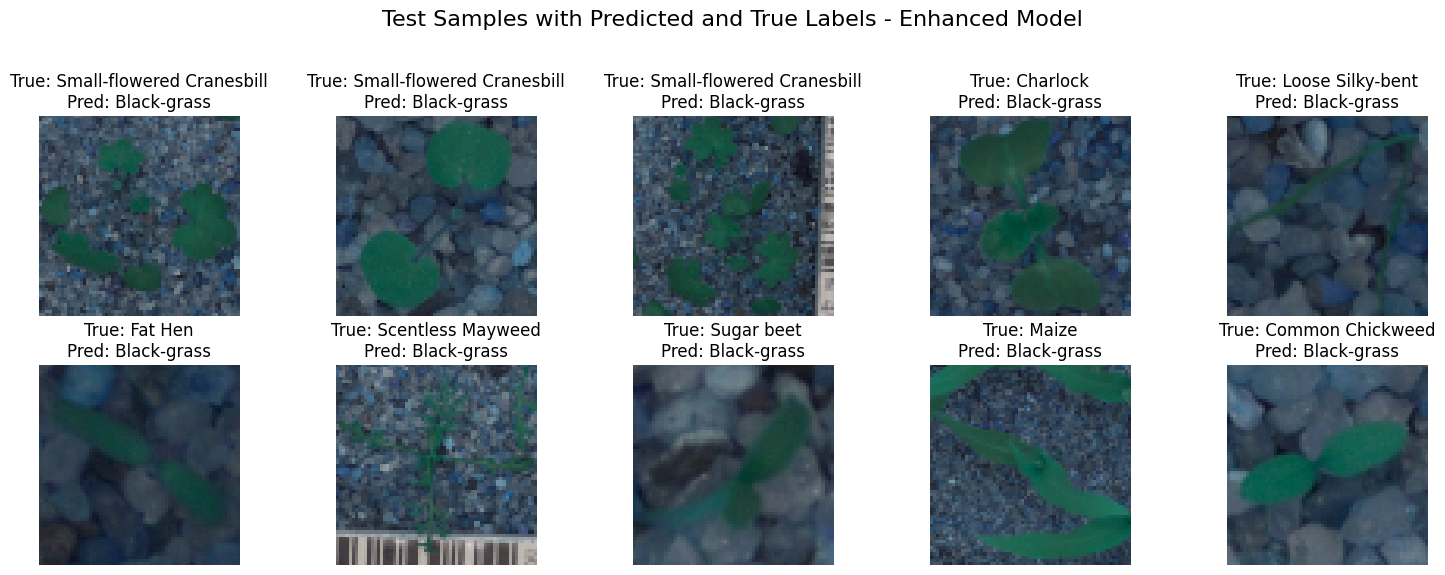

In [27]:
# Visualize a few test samples with their predicted and true labels for the enhanced model
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Test Samples with Predicted and True Labels - Enhanced Model', fontsize=16)

sample_indices = random.sample(range(len(X_val)), 10)
for idx, ax in zip(sample_indices, axes.flat):
    ax.imshow(X_val[idx])
    ax.set_title(f"True: {label_encoder.inverse_transform([y_val[idx]])[0]}\nPred: {label_encoder.inverse_transform([y_pred_enhanced[idx]])[0]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Step 5: Model 3 - Transfer Learning with Pre-trained Models**

## 5.1 Load and Configure Pre-trained Models (VGG16 and ResNet50)

In [28]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load VGG16 with pre-trained weights, excluding the top layer
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model_vgg.layers:
    layer.trainable = False  # Freeze the layers to retain learned features

# Add custom layers on top of VGG16
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization layer
output = Dense(12, activation='softmax')(x)  # 12 classes for 12 plant species
vgg_model = Model(inputs=base_model_vgg.input, outputs=output)

# Compile the VGG16 model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,781,900 (56.39 MB)

 Trainable params: 67,212 (262.55 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
# Load ResNet50 with pre-trained weights, excluding the top layer
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in base_model_resnet.layers:
    layer.trainable = False  # Freeze the layers

# Add custom layers on top of ResNet50
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(12, activation='softmax')(x)
resnet_model = Model(inputs=base_model_resnet.input, outputs=output)

# Compile the ResNet50 model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 70, 70, 3)      │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 32, 32, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 32, 32, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 32, 32, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 34, 34, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 16, 16, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 16, 16, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 16, 16, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 16, 16, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 16, 16, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 16, 16, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 16, 16, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,851,532 (90.99 MB)

 Trainable params: 263,820 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## 5.2 Optional: Hyperparameter Tuning with Keras Tuner

In [30]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [31]:
# If using Keras Tuner to optimize the dense layer in VGG16 or ResNet50 model
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense

def build_model(hp):
    # Base VGG16 model (or ResNet50) without the top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers with tunable units in dense layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('units', min_value=64, max_value=256, step=64), activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(12, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=1, directory='tuner_dir', project_name='plant_classification')

# Run the tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
best_model = tuner.get_best_models(num_models=1)[0]


Trial 4 Complete [00h 00m 44s]
val_accuracy: 0.5073684453964233

Best val_accuracy So Far: 0.5789473652839661
Total elapsed time: 00h 03m 19s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 5.3 Train Both Models (VGG16 and ResNet50)

In [32]:
# Train VGG16 model
history_vgg = vgg_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[early_stopping]
)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.1744 - loss: 2.4555 - val_accuracy: 0.3579 - val_loss: 2.0381
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - accuracy: 0.3407 - loss: 2.0389 - val_accuracy: 0.4053 - val_loss: 1.8337
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.3657 - loss: 1.8730 - val_accuracy: 0.4095 - val_loss: 1.7440
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.3995 - loss: 1.7623 - val_accuracy: 0.4695 - val_loss: 1.6248
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.4208 - loss: 1.7174 - val_accuracy: 0.4916 - val_loss: 1.5512


In [33]:
# Train ResNet50 model
history_resnet = resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.1189 - loss: 2.5618 - val_accuracy: 0.1484 - val_loss: 2.4255
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.1167 - loss: 2.4408 - val_accuracy: 0.1474 - val_loss: 2.4194
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.1438 - loss: 2.4342 - val_accuracy: 0.1484 - val_loss: 2.4182
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.1245 - loss: 2.4252 - val_accuracy: 0.1179 - val_loss: 2.4179
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.1344 - loss: 2.4209 - val_accuracy: 0.1484 - val_loss: 2.4190


## 5.4 Plot Accuracy and Loss Curves

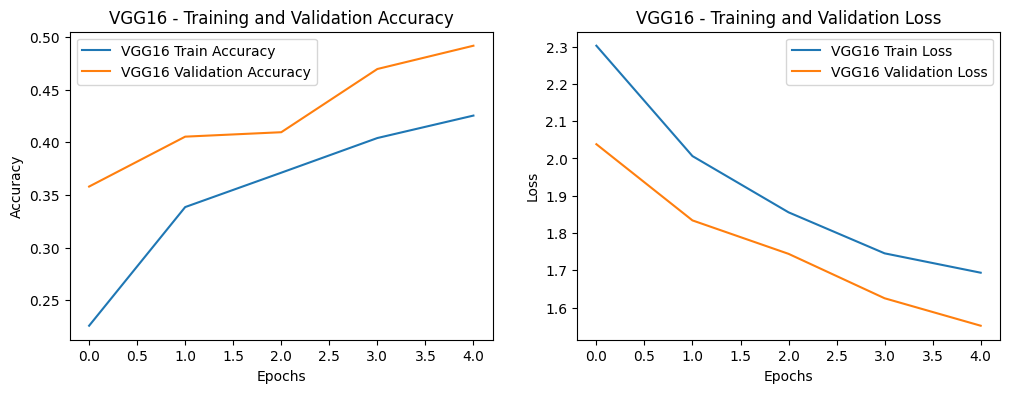

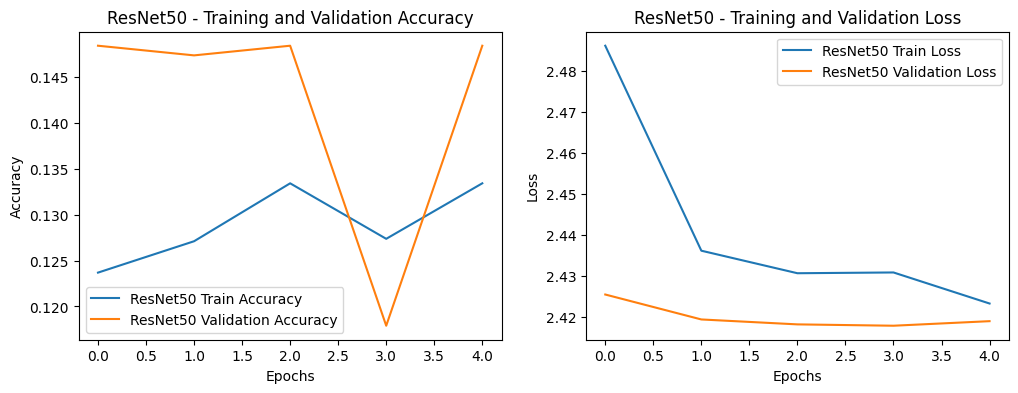

In [34]:
# Plot accuracy and loss curves for VGG16
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='VGG16 Train Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy and loss curves for ResNet50
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.title('ResNet50 - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='ResNet50 Train Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 Validation Loss')
plt.title('ResNet50 - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 5.5 Evaluate Models with Confusion Matrix and Classification Report

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


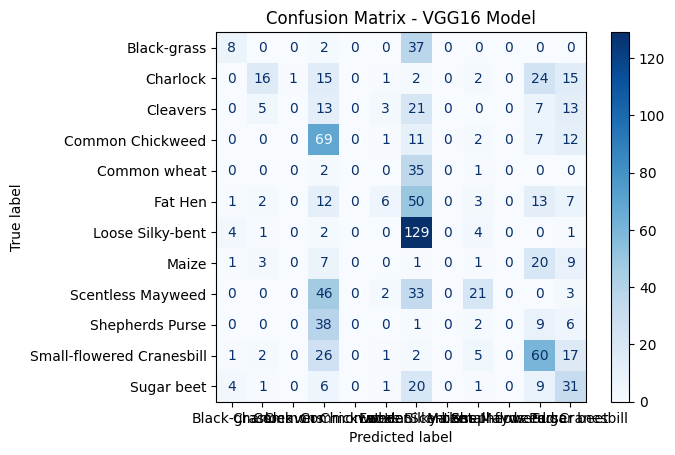

                           precision    recall  f1-score   support

              Black-grass       0.42      0.17      0.24        47
                 Charlock       0.53      0.21      0.30        76
                 Cleavers       0.00      0.00      0.00        62
         Common Chickweed       0.29      0.68      0.41       102
             Common wheat       0.00      0.00      0.00        38
                  Fat Hen       0.40      0.06      0.11        94
         Loose Silky-bent       0.38      0.91      0.53       141
                    Maize       0.00      0.00      0.00        42
        Scentless Mayweed       0.50      0.20      0.29       105
          Shepherds Purse       0.00      0.00      0.00        56
Small-flowered Cranesbill       0.40      0.53      0.46       114
               Sugar beet       0.27      0.42      0.33        73

                 accuracy                           0.36       950
                macro avg       0.27      0.27      0.22    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# VGG16 model predictions
y_pred_vgg = np.argmax(vgg_model.predict(X_val), axis=1)

# Confusion matrix and classification report for VGG16
cm_vgg = confusion_matrix(y_val, y_pred_vgg)
disp_vgg = ConfusionMatrixDisplay(confusion_matrix=cm_vgg, display_labels=label_encoder.classes_)
disp_vgg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - VGG16 Model')
plt.show()
print(classification_report(y_val, y_pred_vgg, target_names=label_encoder.classes_))



30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step


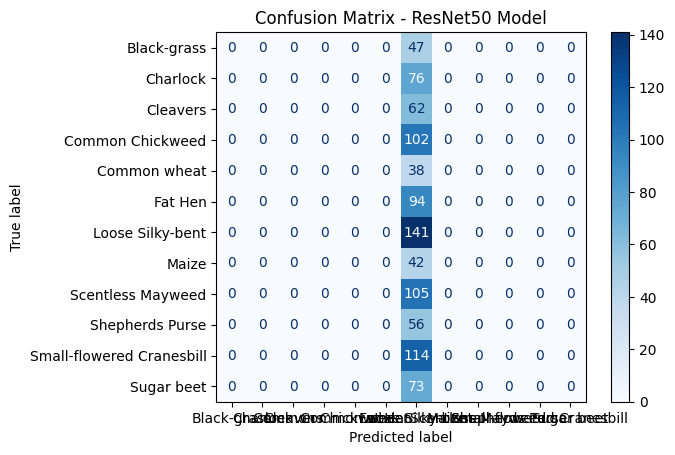

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        47
                 Charlock       0.00      0.00      0.00        76
                 Cleavers       0.00      0.00      0.00        62
         Common Chickweed       0.00      0.00      0.00       102
             Common wheat       0.00      0.00      0.00        38
                  Fat Hen       0.00      0.00      0.00        94
         Loose Silky-bent       0.15      1.00      0.26       141
                    Maize       0.00      0.00      0.00        42
        Scentless Mayweed       0.00      0.00      0.00       105
          Shepherds Purse       0.00      0.00      0.00        56
Small-flowered Cranesbill       0.00      0.00      0.00       114
               Sugar beet       0.00      0.00      0.00        73

                 accuracy                           0.15       950
                macro avg       0.01      0.08      0.02    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# ResNet50 model predictions
y_pred_resnet = np.argmax(resnet_model.predict(X_val), axis=1)

# Confusion matrix and classification report for ResNet50
cm_resnet = confusion_matrix(y_val, y_pred_resnet)
disp_resnet = ConfusionMatrixDisplay(confusion_matrix=cm_resnet, display_labels=label_encoder.classes_)
disp_resnet.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - ResNet50 Model')
plt.show()
print(classification_report(y_val, y_pred_resnet, target_names=label_encoder.classes_))


## 5.6 Visualize Test Samples with Predictions

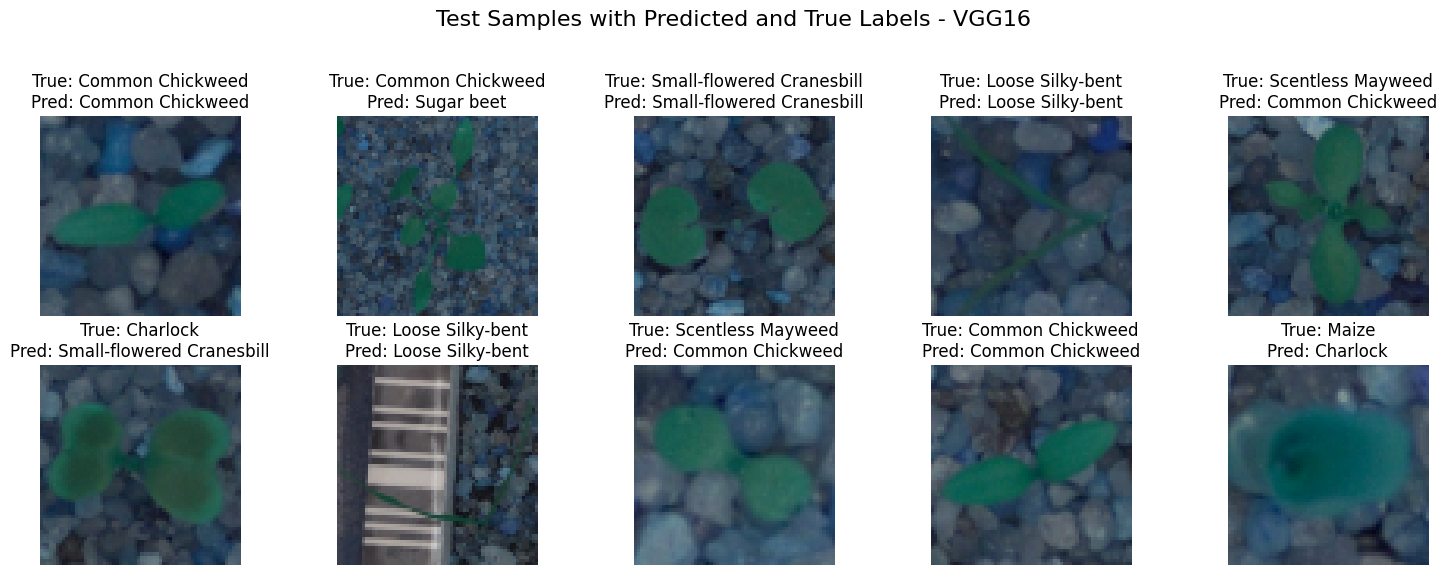

In [37]:
# Visualize test samples with predictions for VGG16
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Test Samples with Predicted and True Labels - VGG16', fontsize=16)
sample_indices = random.sample(range(len(X_val)), 10)
for idx, ax in zip(sample_indices, axes.flat):
    ax.imshow(X_val[idx])
    ax.set_title(f"True: {label_encoder.inverse_transform([y_val[idx]])[0]}\nPred: {label_encoder.inverse_transform([y_pred_vgg[idx]])[0]}")
    ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


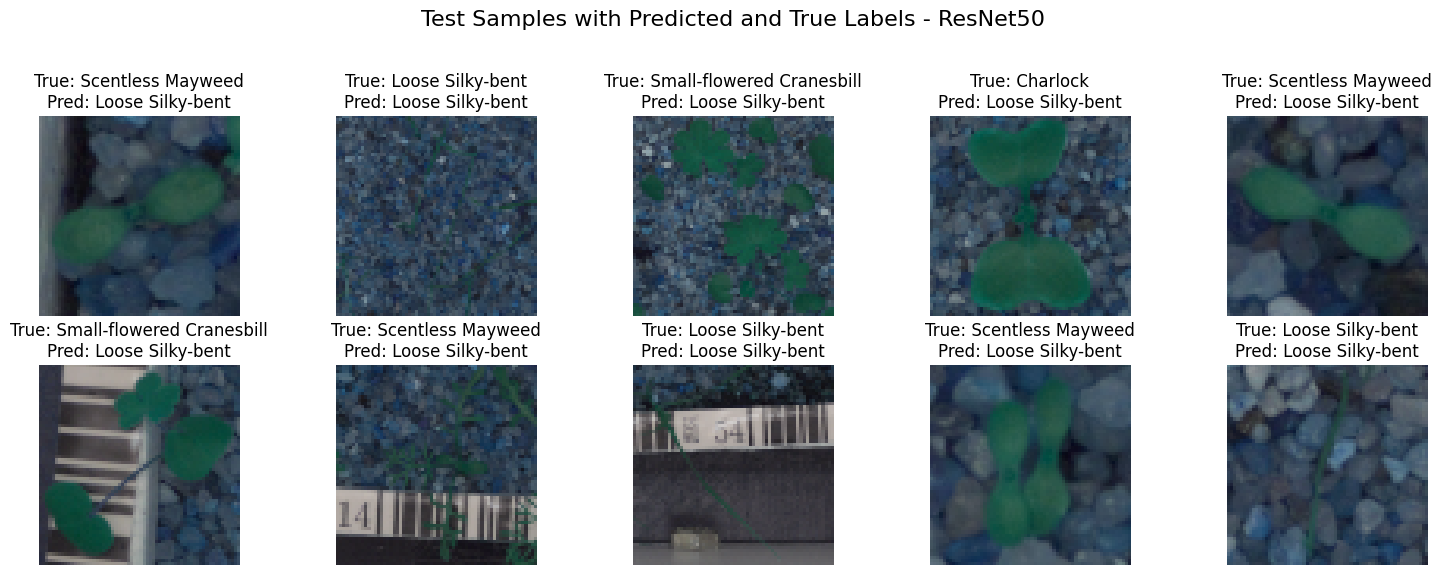

In [38]:
# Visualize test samples with predictions for ResNet50
import random

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Test Samples with Predicted and True Labels - ResNet50', fontsize=16)

sample_indices = random.sample(range(len(X_val)), 10)
for idx, ax in zip(sample_indices, axes.flat):
    ax.imshow(X_val[idx])
    true_label = label_encoder.inverse_transform([y_val[idx]])[0]
    pred_label = label_encoder.inverse_transform([y_pred_resnet[idx]])[0]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Step 6: Model Comparison and F1 Score Analysis

## 6.1 Calculate F1 Scores for Each Model

In [39]:
from sklearn.metrics import f1_score

# Calculate F1 scores for each model
f1_basic_cnn = f1_score(y_val, y_pred, average='weighted')
f1_enhanced_cnn = f1_score(y_val, y_pred_enhanced, average='weighted')
f1_vgg16 = f1_score(y_val, y_pred_vgg, average='weighted')
f1_resnet50 = f1_score(y_val, y_pred_resnet, average='weighted')

# Display F1 scores
print(f"F1 Score - Basic CNN: {f1_basic_cnn:.4f}")
print(f"F1 Score - Enhanced CNN: {f1_enhanced_cnn:.4f}")
print(f"F1 Score - VGG16 Transfer Learning: {f1_vgg16:.4f}")
print(f"F1 Score - ResNet50 Transfer Learning: {f1_resnet50:.4f}")


F1 Score - Basic CNN: 0.7814
F1 Score - Enhanced CNN: 0.0047
F1 Score - VGG16 Transfer Learning: 0.2817
F1 Score - ResNet50 Transfer Learning: 0.0384


## 6.2 Store F1 Scores in a DataFrame

In [40]:
# Create a DataFrame to store the F1 scores
f1_scores_df = pd.DataFrame({
    'Model': ['Basic_CNN', 'Enhanced_CNN', 'VGG16_Transfer_Learning', 'ResNet50_Transfer_Learning'],
    'F1 Score': [f1_basic_cnn, f1_enhanced_cnn, f1_vgg16, f1_resnet50]
})

# Display the DataFrame
print(f1_scores_df)


                        Model  F1 Score
0                   Basic_CNN  0.781416
1                Enhanced_CNN  0.004665
2     VGG16_Transfer_Learning  0.281706
3  ResNet50_Transfer_Learning  0.038364


## Saving F1-Scores as CSV

In [42]:
file_path = 'drive/My Drive/655_deep_learning/Assignmenet_2_f1_scores.csv'  # Added a filename to the path
f1_scores_df.to_csv(file_path, index=False)

## 6.3 Visualize the F1 Score Comparison with a Bar Plot

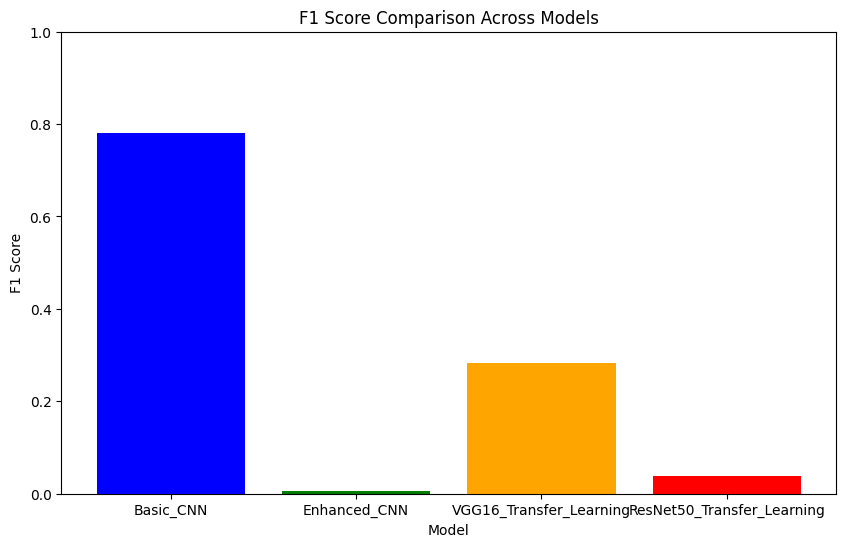

In [43]:
import matplotlib.pyplot as plt

# Plot the F1 score comparison
plt.figure(figsize=(10, 6))
plt.bar(f1_scores_df['Model'], f1_scores_df['F1 Score'], color=['blue', 'green', 'orange', 'red'])
plt.title('F1 Score Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.show()
